In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LM regressions

## Displacements due to drought

### Regression coefficients

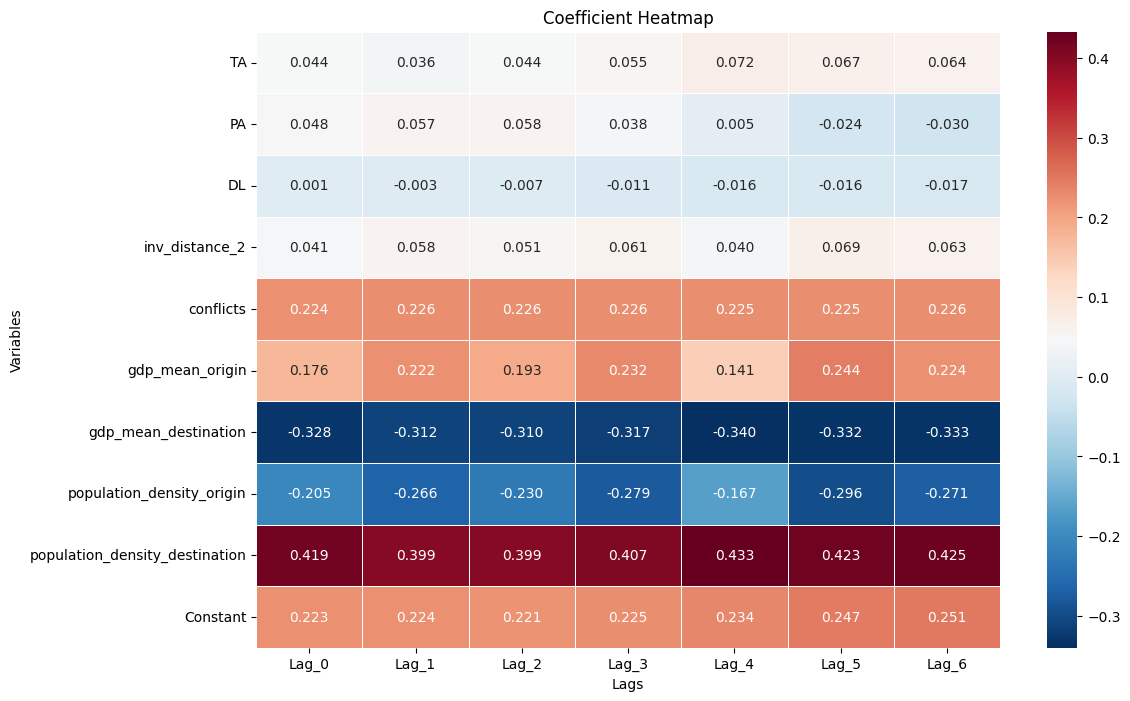

In [3]:
# Creating a dictionary with the coefficients and standard errors
data = {
    'Variable': ['TA', 'PA', 'DL', 'inv_distance_2', 'conflicts', 'gdp_mean_origin', 'gdp_mean_destination',
                 'population_density_origin', 'population_density_destination', 'Constant'],
    'Lag_0': [0.044, 0.048, 0.001, 0.041, 0.224, 0.176, -0.328, -0.205, 0.419, 0.223],
    'Lag_1': [0.036, 0.057, -0.003, 0.058, 0.226, 0.222, -0.312, -0.266, 0.399, 0.224],
    'Lag_2': [0.044, 0.058, -0.007, 0.051, 0.226, 0.193, -0.310, -0.230, 0.399, 0.221],
    'Lag_3': [0.055, 0.038, -0.011, 0.061, 0.226, 0.232, -0.317, -0.279, 0.407, 0.225],
    'Lag_4': [0.072, 0.005, -0.016, 0.040, 0.225, 0.141, -0.340, -0.167, 0.433, 0.234],
    'Lag_5': [0.067, -0.024, -0.016, 0.069, 0.225, 0.244, -0.332, -0.296, 0.423, 0.247],
    'Lag_6': [0.064, -0.030, -0.017, 0.063, 0.226, 0.224, -0.333, -0.271, 0.425, 0.251]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Reshaping the DataFrame for heatmap
heatmap_data = df.set_index('Variable')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap= 'RdBu_r', annot=True, fmt=".3f", linewidths=.5)
plt.title('Coefficient Heatmap')
plt.ylabel('Variables')
plt.xlabel('Lags')
plt.show()


### All years, new

Number of observations: 3630


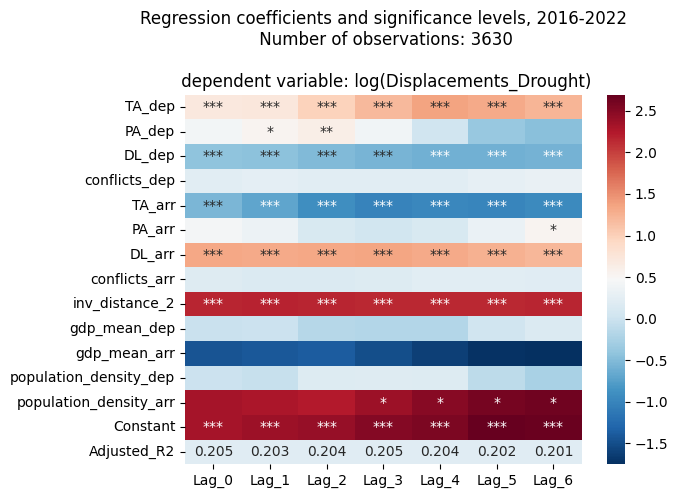

In [4]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all_new.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all_new.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all_new.csv")
nobs = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs.csv")

df = df.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,14):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[14, 1:8] = df_p.iloc[14, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-3, vmax=3) 
ax.set_yticklabels(['TA_dep', 'PA_dep', 'DL_dep', 'conflicts_dep', 'TA_arr', 'PA_arr',
       'DL_arr', 'conflicts_arr', 'inv_distance_2', 'gdp_mean_dep',
       'gdp_mean_arr', 'population_density_dep', 'population_density_arr', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Drought)')
plt.savefig("regr_coef_drought_all_new.pdf", bbox_inches='tight')
plt.show()

Number of observations: 1199


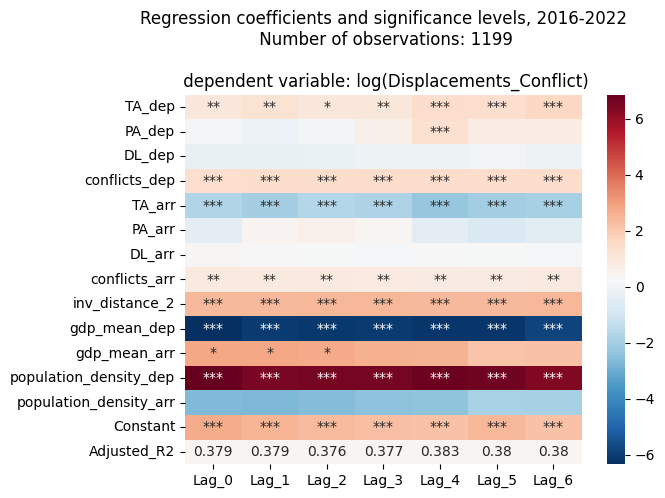

In [5]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all_new_confl.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all_new_confl.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all_new_confl.csv")
nobs = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs_confl.csv")

df = df.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,14):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[14, 1:8] = df_p.iloc[14, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-3, vmax=3) 
ax.set_yticklabels(['TA_dep', 'PA_dep', 'DL_dep', 'conflicts_dep', 'TA_arr', 'PA_arr',
       'DL_arr', 'conflicts_arr', 'inv_distance_2', 'gdp_mean_dep',
       'gdp_mean_arr', 'population_density_dep', 'population_density_arr', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Conflict)')
plt.savefig("regr_coef_confl_all_new.pdf", bbox_inches='tight')
plt.show()

### All years

Number of observations: 1199


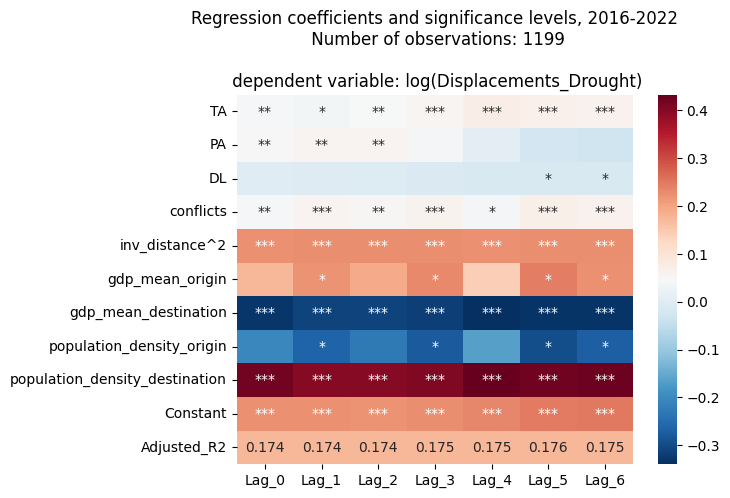

In [6]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all.csv")
df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,10):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-3, vmax=3) 
ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                    'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Drought)')
#plt.savefig("regression_coefficients_drought_all.pdf", bbox_inches='tight')
plt.show()

### Individual years, from 2016 to 2022

Number of observations: 130


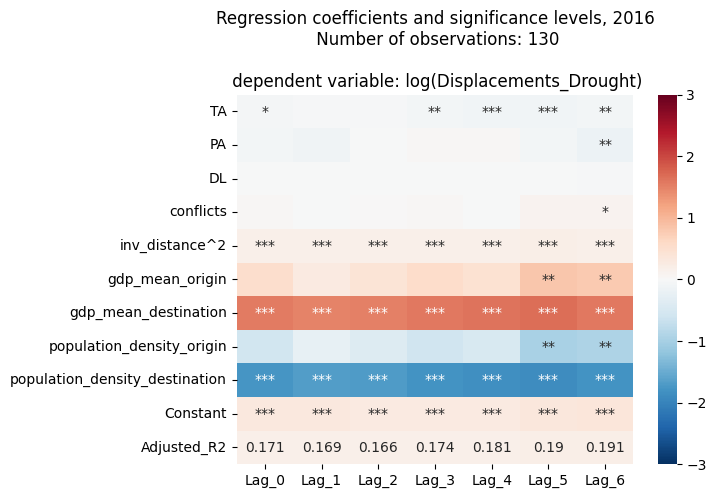

Number of observations: 121


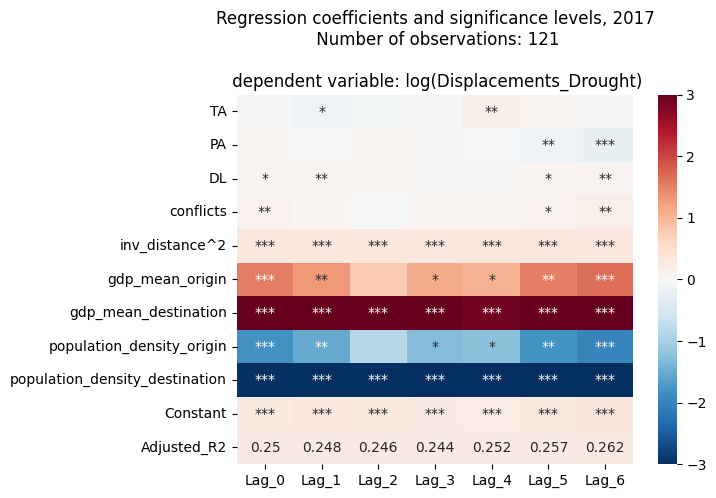

Number of observations: 240


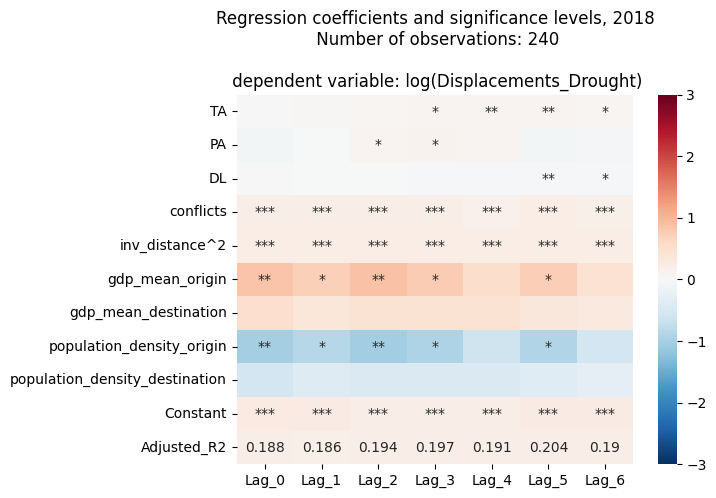

Number of observations: 218


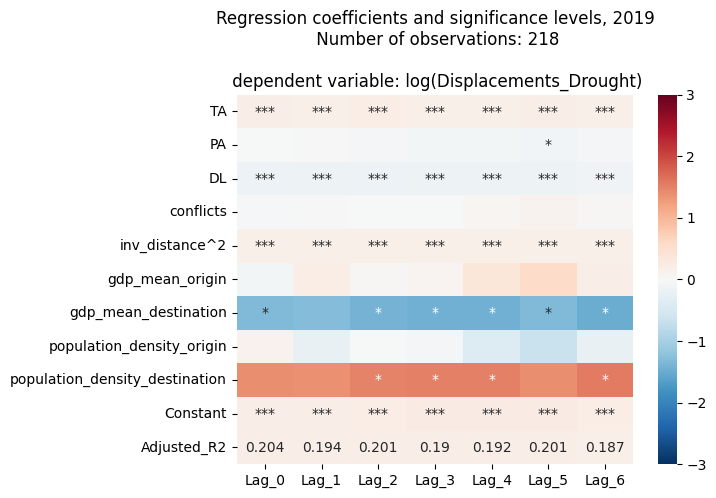

Number of observations: 188


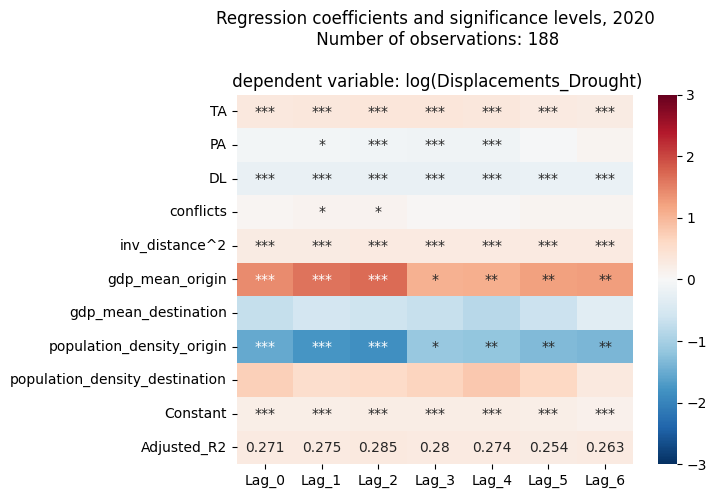

Number of observations: 169


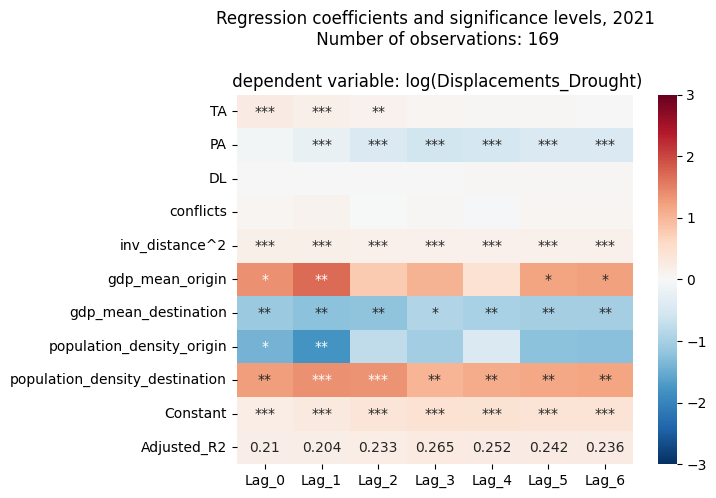

Number of observations: 133


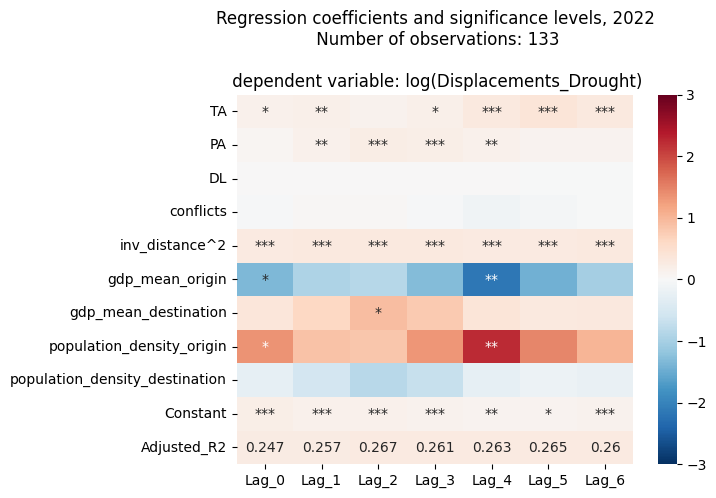

In [7]:
for f in range(16,23):
    #load csv
    df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_"+str(f)+r"_c.csv")
    df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_"+str(f)+r".csv")
    df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_"+str(f)+r".csv")
    df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
    df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

    df1['Unnamed: 0']='Adjusted_R2'
    df1.columns = df.columns
    df_t = pd.concat([df, df1], ignore_index=True)
    df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

    df2.iloc[:,1:].values
    df_p = df_t.copy()

    #substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
    for i in range(0,10):
        for j in range(1,8):
            if df2.iloc[i,j] < 0.01:
                df_p.iloc[i,j] = '***'
            elif df2.iloc[i,j] < 0.05:
                df_p.iloc[i,j] = '**'
            elif df2.iloc[i,j] < 0.1:
                df_p.iloc[i,j] = '*'
            else:
                df_p.iloc[i,j] = ''
    #3 decimal digits in df_p
    df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
    df_p.drop(columns=['Variable'], inplace=True)

    # heatmap of regression coefficients and significance levels
    
    data = df_t.iloc[:,1:].values
    fig, ax = plt.subplots() 
    ax.set_ylim(-3, 3)
    # drawing heatmap on current axes 
    ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-3, vmax=3) 
    ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                        'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
    ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])
 
    print('Number of observations: '+str(nobs.iloc[:,f-14][0]))
    plt.title('Regression coefficients and significance levels, 20'+ str(f)+'\n Number of observations: '+str(nobs.iloc[:,f-14][0]) + '\n\n dependent variable: log(Displacements_Drought)')
    plt.savefig("regression_coefficients_drought_"+ str(f)+".pdf", bbox_inches='tight')
    plt.show()

## Displacements due to conflict

### All years

Number of observations: 1199


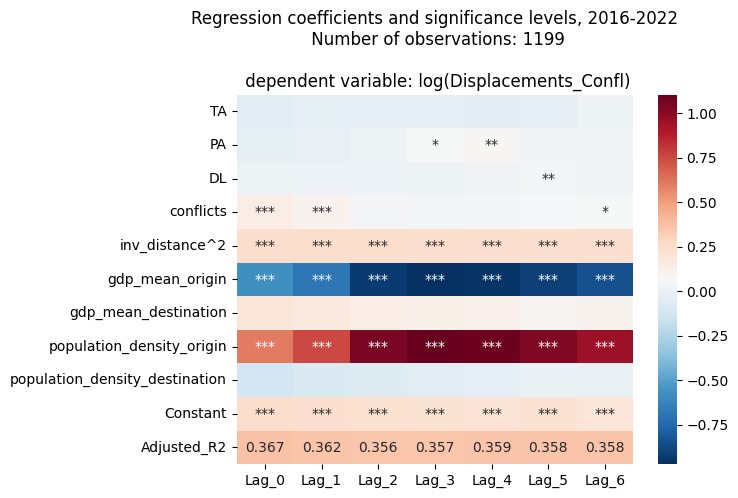

In [8]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all_confl.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all_confl.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all_confl.csv")
nobs_c = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs_confl.csv")
df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,10):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-3, vmax=3) 
ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                    'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs_c.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs_c.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Confl)')
plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
plt.show()

### Individual years, from 2016 to 2022

Number of observations: 130


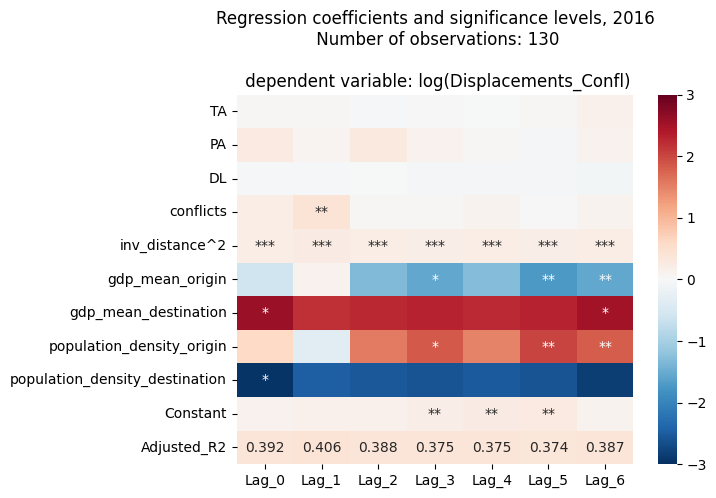

Number of observations: 121


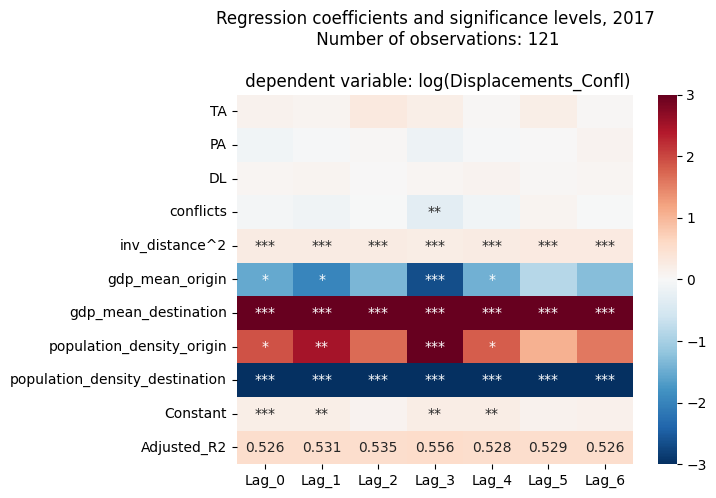

Number of observations: 240


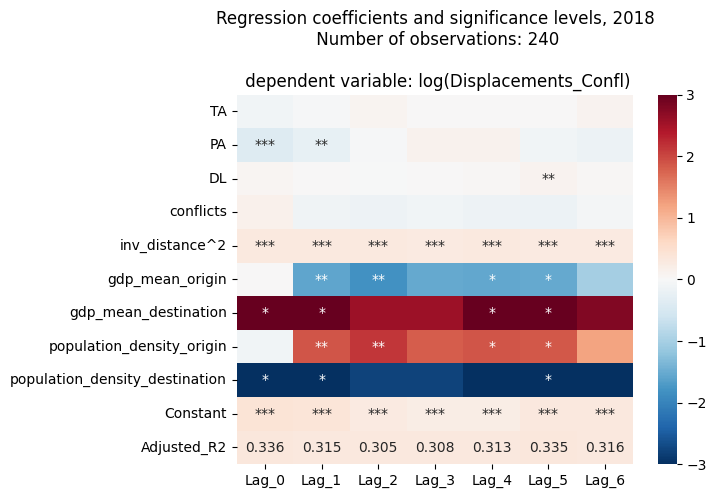

Number of observations: 218


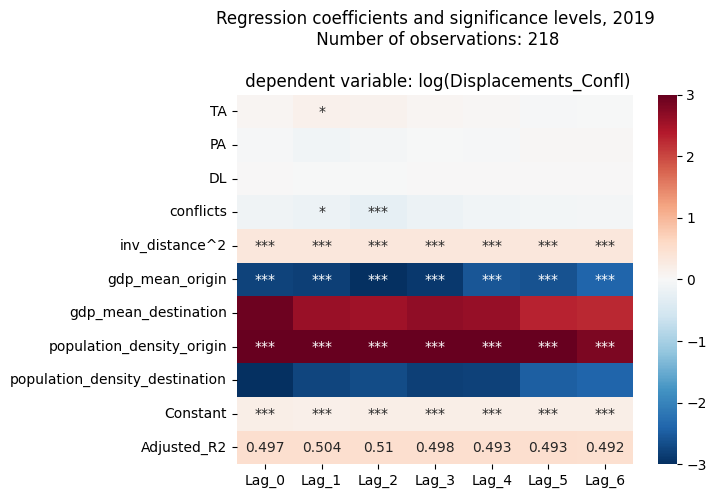

Number of observations: 188


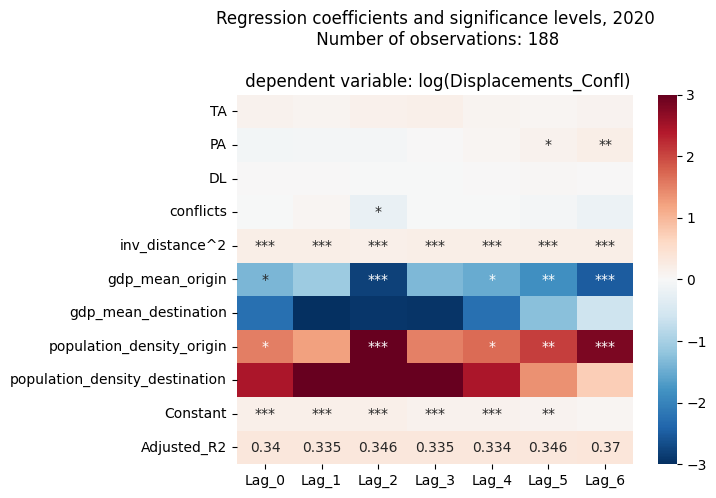

Number of observations: 169


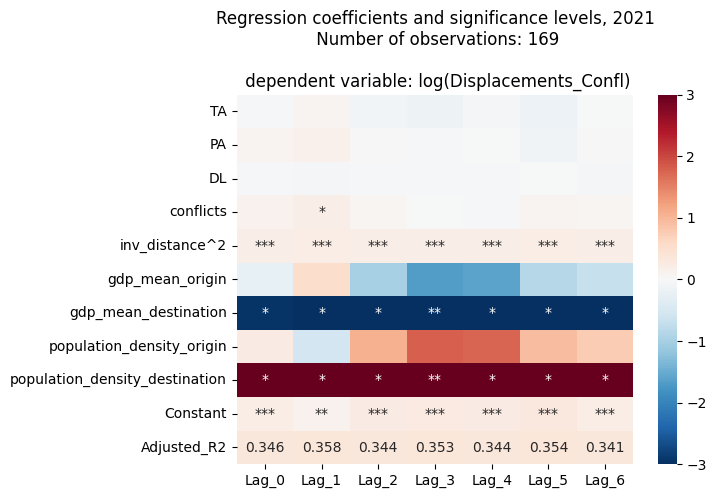

Number of observations: 133


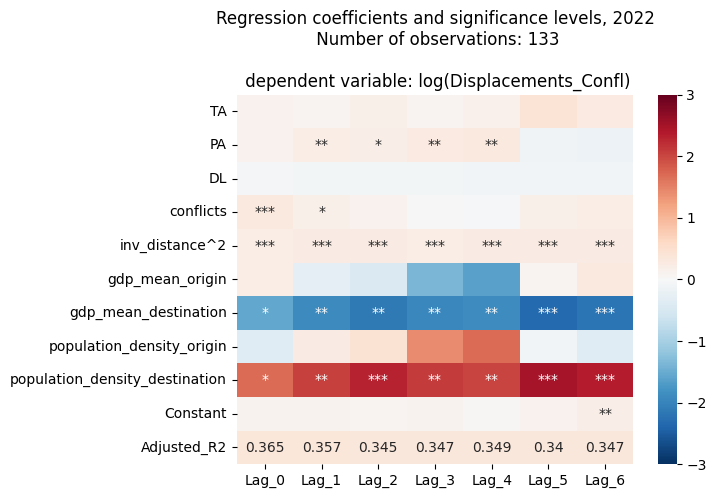

In [9]:
for f in range(16,23):
    #load csv
    df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_"+str(f)+r"_c_confl.csv")
    df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_"+str(f)+r"_confl.csv")
    df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_"+str(f)+r"_confl.csv")
    df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
    df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

    df1['Unnamed: 0']='Adjusted_R2'
    df1.columns = df.columns
    df_t = pd.concat([df, df1], ignore_index=True)
    df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

    df2.iloc[:,1:].values
    df_p = df_t.copy()

    #substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
    for i in range(0,10):
        for j in range(1,8):
            if df2.iloc[i,j] < 0.01:
                df_p.iloc[i,j] = '***'
            elif df2.iloc[i,j] < 0.05:
                df_p.iloc[i,j] = '**'
            elif df2.iloc[i,j] < 0.1:
                df_p.iloc[i,j] = '*'
            else:
                df_p.iloc[i,j] = ''
    #3 decimal digits in df_p
    df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
    df_p.drop(columns=['Variable'], inplace=True)

    # heatmap of regression coefficients and significance levels
    
    data = df_t.iloc[:,1:].values
    fig, ax = plt.subplots() 
    ax.set_ylim(-3, 3)
    # drawing heatmap on current axes 
    ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-3, vmax=3) 
    ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                        'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
    ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])
 
    print('Number of observations: '+str(nobs_c.iloc[:,f-14][0]))
    plt.title('Regression coefficients and significance levels, 20'+ str(f)+'\n Number of observations: '+str(nobs_c.iloc[:,f-14][0]) + '\n\n dependent variable: log(Displacements_Confl)')
    plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
    plt.show()

# Spatial regressions

In [118]:
df_p.iloc[9, 1:8].astype(float).round(3)

Lag_0    3213.049
Lag_1    3212.313
Lag_2    3217.527
Lag_3    3216.109
Lag_4    3216.127
Lag_5    3214.969
Lag_6    3213.052
Name: 9, dtype: float64

In [120]:
df_p

,Lag_0,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6
0,*,***,***,***,***,***,***
1,**,**,*,**,*,,
2,,,,,*,**,
3,***,,**,,,,
4,,,,,,,
5,,,,,,,
6,,,,,,,
7,,,,,,,


## SLX

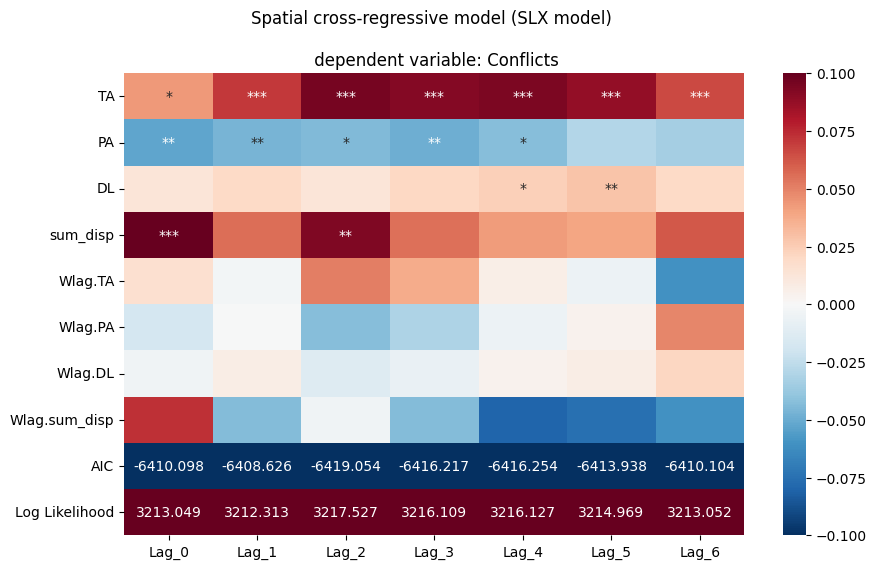

In [126]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_all.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_r_all.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_p_all.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_ll_all.csv")

df1['Unnamed: 0']='AIC'
df3['Unnamed: 0']='LogLikelihood'
df1.columns = df.columns
df3.columns = df.columns
df_t = pd.concat([df, df1, df3], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,8):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[8, 1:8] = df_p.iloc[8, 1:8].astype(float).round(3)
df_p.iloc[9, 1:8] = df_p.iloc[9, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:10,:]

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:10,1:].values
fig, ax = plt.subplots(figsize=(10, 6)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 

#ax.set_ylim(-0.1, 0.1)
ax.set_yticklabels(['TA', 'PA', 'DL', 'sum_disp', 'Wlag.TA', 'Wlag.PA', 'Wlag.DL', 'Wlag.sum_disp', 'AIC', 'Log Likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Spatial cross-regressive model (SLX model) \n\n dependent variable: Conflicts')
#plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
plt.show()

## SDM

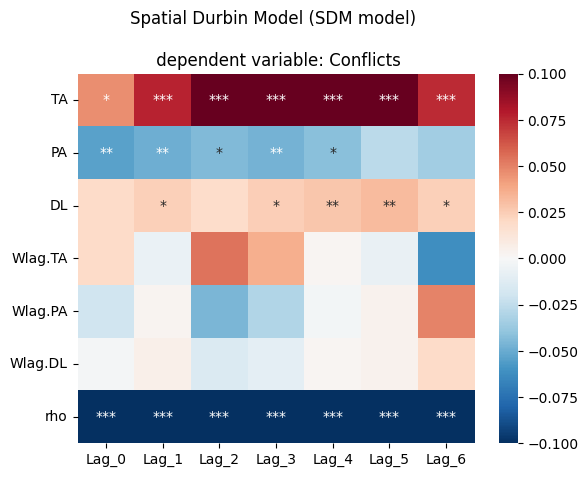

In [13]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_all.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_r_all.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_p_all.csv")


df = df.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df1 = df1.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df2 = df2.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)

df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,7):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[7, 1:8] = df_p.iloc[7, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:7,:]
# heatmap of regression coefficients and significance levels

data = df_t.iloc[:7,1:].values
fig, ax = plt.subplots() 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'Wlag.TA', 'Wlag.PA', 'Wlag.DL', 'rho'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Spatial Durbin Model (SDM model) \n\n dependent variable: Conflicts')
#plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
plt.show()

## PLM

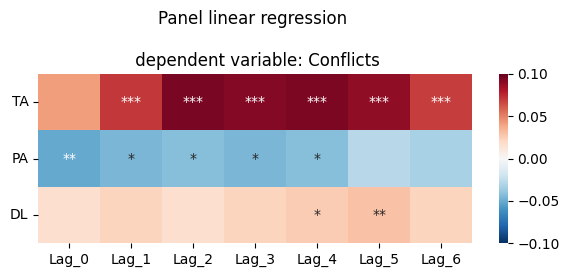

In [14]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_all.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_r_all.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_p_all.csv")


df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,3):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[3, 1:8] = df_p.iloc[3, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:3,:]
# heatmap of regression coefficients and significance levels

data = df_t.iloc[:3,1:].values
fig, ax = plt.subplots(figsize=(7, 2.2)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression \n\n dependent variable: Conflicts')
#plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
plt.show()

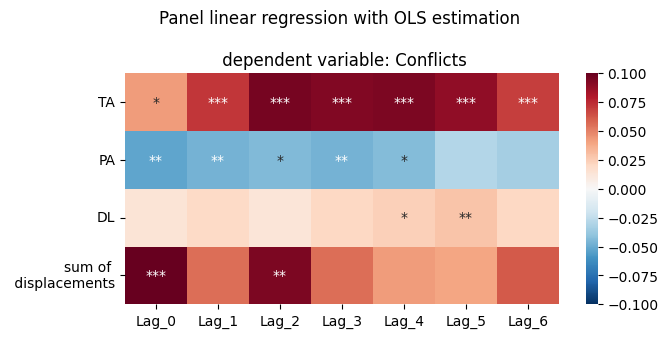

In [85]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_all_d.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_r_all_d.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_p_all_d.csv")

#df = df.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df1 = df1.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df2 = df2.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)

df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,4):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[4, 1:8] = df_p.iloc[4, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:4,:]
# heatmap of regression coefficients and significance levels

data = df_t.iloc[:4,1:].values
#add the log-likelihood to the dataframe
fig, ax = plt.subplots(figsize=(7, 3)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'sum of \n displacements'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression with OLS estimation \n\n dependent variable: Conflicts')
#plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
plt.show()

In [135]:
df1.iloc[0]

Unnamed: 0            AIC
coef.fe.         0.006348
coef.fe_lag1.    0.009567
coef.fe_lag2.    0.013028
coef.fe_lag3.    0.014231
coef.fe_lag4.    0.015072
coef.fe_lag5.    0.013669
coef.fe_lag6.    0.009025
Name: 0, dtype: object

In [141]:
df_t

,Variable,Lag_0,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6
0,TA,0.041426,0.070505,0.095080,0.091907,0.094186,0.088519,0.068992
1,PA,-0.051351,-0.046018,-0.042341,-0.046069,-0.042194,-0.027964,-0.032735
2,DL,0.017172,0.021901,0.016535,0.022392,0.025194,0.029570,0.022423
3,R squared,0.006348,0.009567,0.013028,0.014231,0.015072,0.013669,0.009025


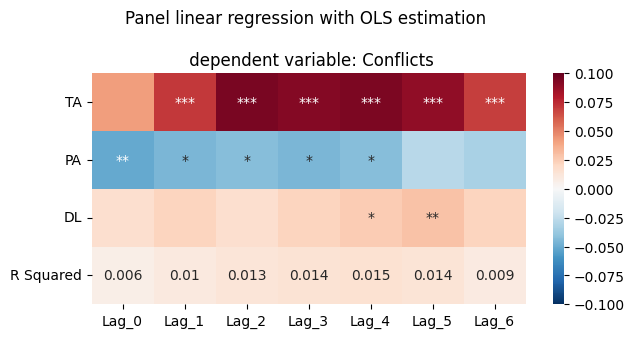

In [144]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_all.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_r_all.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_p_all.csv")

#df1 = df1.iloc[0]
df1['Unnamed: 0']='R squared'
df1.columns = df.columns
df1 = df1.iloc[:1,:]
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,3):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[3, 1:8] = df_p.iloc[3, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:4,:]
# heatmap of regression coefficients and significance levels

data = df_t.iloc[:4,1:].values
#add the log-likelihood to the dataframe
fig, ax = plt.subplots(figsize=(7, 3)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'R Squared'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression with OLS estimation \n\n dependent variable: Conflicts')
plt.savefig("OLS_fe.pdf", bbox_inches='tight')
plt.show()

In [130]:
df_p

,Lag_0,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6
0,,***,***,***,***,***,***
1,**,*,*,*,*,,
2,,,,,*,**,


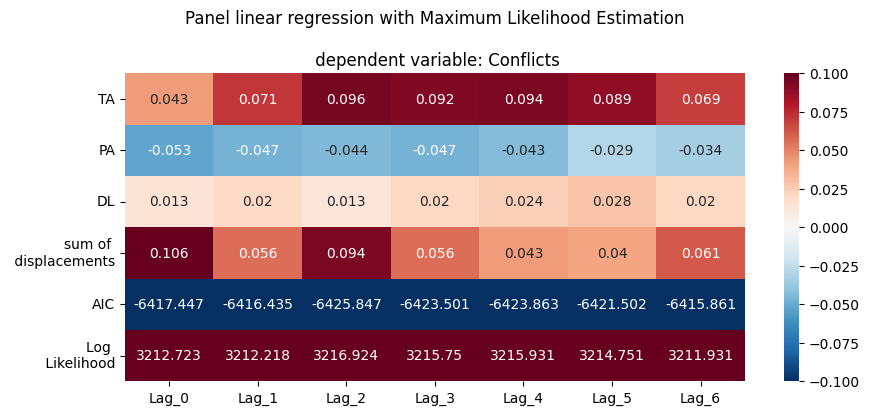

In [127]:
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_aic.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_ll.csv")

df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df2.columns = df.columns
df_t = pd.concat([df, df1, df2], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.iloc[:6, 1:].round(3)

# heatmap of regression coefficients and significance levels
data = df_t.iloc[:6,1:].values

fig, ax = plt.subplots(figsize=(10, 4)) 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1)
ax.set_yticklabels(['TA', 'PA', 'DL', 'sum of \n displacements', 'AIC', 'Log \n Likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression with Maximum Likelihood Estimation\n\n dependent variable: Conflicts')
plt.savefig("MLE_fe_disp.pdf", bbox_inches='tight')
plt.show()

In [64]:
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_aic.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_ll.csv")

df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df2.columns = df.columns
df_t = pd.concat([df, df1, df2], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.iloc[:6, 1:].round(3)

# heatmap of regression coefficients and significance levels
data = df_t.iloc[:6,1:].values

fig, ax = plt.subplots(figsize=(10, 4)) 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1)
ax.set_yticklabels(['TA', 'PA', 'DL', 'sum of \n displacements', 'AIC', 'Log \n Likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression with Maximum Likelihood Estimation\n\n dependent variable: Conflicts')
#plt.savefig("MLE_fe_disp.pdf", bbox_inches='tight')
plt.show()

,Unnamed: 0,coef.fe_ps.,coef.fe_ps_lag1.,coef.fe_ps_lag2.,coef.fe_ps_lag3.,coef.fe_ps_lag4.,coef.fe_ps_lag5.,coef.fe_ps_lag6.,logLik.fe_ps.,logLik.fe_ps_lag1.,logLik.fe_ps_lag2.,logLik.fe_ps_lag3.,logLik.fe_ps_lag4.,logLik.fe_ps_lag5.,logLik.fe_ps_lag6.
0,TA,0.042765,0.071100,0.095792,0.092214,0.094346,0.088561,0.068976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PA,-0.053052,-0.046896,-0.044445,-0.047464,-0.043286,-0.029050,-0.034017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DL,0.013341,0.019863,0.013097,0.020411,0.023730,0.028284,0.020463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sum_disp,0.105510,0.056022,0.094178,0.055976,0.042783,0.039547,0.061273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AIC,-6417.446782,-6416.435074,-6425.847486,-6423.500606,-6423.862915,-6421.502283,-6415.861258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3212.723391,3212.217537,3216.923743,3215.750303,3215.931457,3214.751141,3211.930629


In [84]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_all_d.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_r_all_d.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_p_all_d.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ll_all_d.csv")

#df = df.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df1 = df1.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df2 = df2.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)

df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,4):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.loc[len(df_p)] = df3
df_p.iloc[4, 1:8] = df_p.iloc[4, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:4,:]
# heatmap of regression coefficients and significance levels

data = df_t.iloc[:4,1:].values
#add the log-likelihood to the dataframe
df_p = df_p.append(df3)
data = data.appent(df3)
fig, ax = plt.subplots(figsize=(7, 3)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'sum of \n displacements'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression \n\n dependent variable: Conflicts')
#plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
plt.show()

ValueError: cannot set a row with mismatched columns